In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [296]:
#Loading data

dataset = pd.read_csv(filepath_or_buffer='BTCUSDT1H.csv', delimiter=';')
dataset = dataset.replace('\.', '', regex=True)
dataset['Date'] = pd.to_datetime(dataset['Date'])

print(dataset)

                     Date      Open      High       Low     Close  Volume BTC  \
0     2023-05-22 23:00:00  26872.02  26883.17  26834.45  26849.27  561.214150   
1     2023-05-22 22:00:00  26900.52  26913.78  26872.02  26872.03  371.218000   
2     2023-05-22 21:00:00  26895.14  26959.52  26880.44  26900.52  576.121710   
3     2023-05-22 20:00:00  26862.43  26934.93  26833.21  26895.13  525.781200   
4     2023-05-22 19:00:00  26880.19  26889.96  26819.10  26862.43  883.210860   
...                   ...       ...       ...       ...       ...         ...   
50384 2017-08-17 08:00:00   4333.32   4377.85   4333.32   4360.69    0.972807   
50385 2017-08-17 07:00:00   4316.62   4349.99   4287.41   4349.99    4.443249   
50386 2017-08-17 06:00:00   4330.29   4345.45   4309.37   4324.35    7.229691   
50387 2017-08-17 05:00:00   4308.83   4328.69   4291.37   4315.32   23.234916   
50388 2017-08-17 04:00:00   4261.48   4313.62   4261.32   4308.83   47.181009   

        Volume USDT  tradec

In [297]:
#Diving x data and y data
X = dataset[['Open', 'High', 'Low', 'Volume BTC', 'Volume USDT']]
y = dataset['Close']

In [298]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [299]:
#Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y_scaled, test_size=0.3, shuffle=False)


In [300]:
#Reshaping the data to LSTM format
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [301]:
#Creating the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, train_X.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [302]:
#Training the model
model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1103/1103 [==============================] - 6s 2ms/step - loss: 0.0041
Epoch 2/50
1103/1103 [==============================] - 2s 2ms/step - loss: 7.3346e-06
Epoch 3/50
1103/1103 [==============================] - 2s 2ms/step - loss: 7.5243e-06
Epoch 4/50
1103/1103 [==============================] - 3s 2ms/step - loss: 7.7173e-06
Epoch 5/50
1103/1103 [==============================] - 2s 2ms/step - loss: 8.5188e-06
Epoch 6/50
1103/1103 [==============================] - 2s 2ms/step - loss: 8.4068e-06
Epoch 7/50
1103/1103 [==============================] - 3s 2ms/step - loss: 7.9939e-06
Epoch 8/50
1103/1103 [==============================] - 3s 2ms/step - loss: 8.3816e-06
Epoch 9/50
1103/1103 [==============================] - 3s 3ms/step - loss: 7.8634e-06
Epoch 10/50
1103/1103 [==============================] - 3s 3ms/step - loss: 8.2400e-06
Epoch 11/50
1103/1103 [==============================] - 3s 3ms/step - loss: 7.3701e-06
Epoch 12/50
1103/1103 [======================

In [303]:
#Predicting
y_pred = model.predict(test_X)
y_pred = scaler.inverse_transform(y_pred)
test_y = scaler.inverse_transform(test_y)

473/473 [==============================] - 1s 929us/step


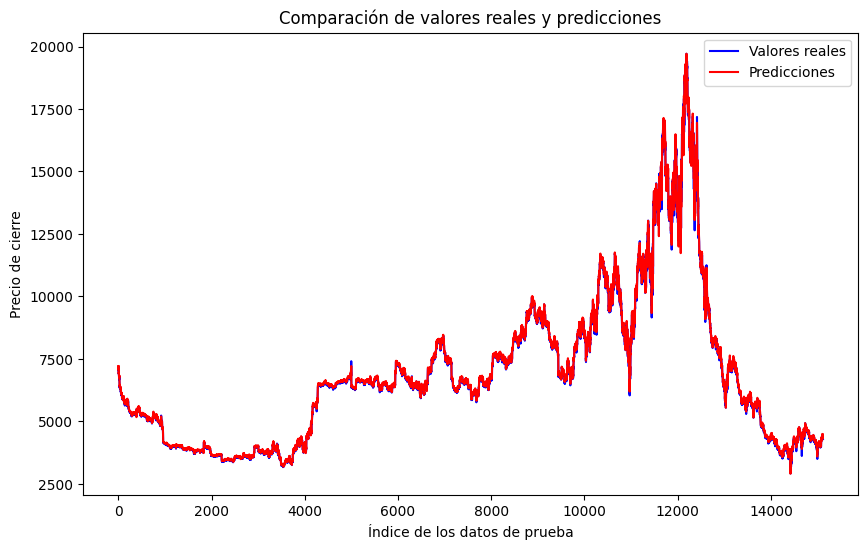

In [304]:
#Graph
plt.figure(figsize=(10, 6))
plt.plot(test_y, color='b', label='Valores reales')
plt.plot(y_pred, color='r', label='Predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Precio de cierre')
plt.title('Comparación de valores reales y predicciones')
plt.legend()
plt.show()

In [310]:
# Calcular la precisión de las predicciones
correct_up_predictions = 0
correct_down_predictions = 0

# Comparar el valor de cierre real y las predicciones
for i in range(1, len(test_y)):
    if test_y[i] > test_y[i-1] and y_pred[i] > test_y[i-1]:
        correct_up_predictions += 1
    elif test_y[i] < test_y[i-1] and y_pred[i] < test_y[i-1]:
        correct_down_predictions += 1

total_up_predictions = np.sum(test_y[1:] > test_y[:-1])
total_down_predictions = np.sum(test_y[1:] < test_y[:-1])

accuracy_up = correct_up_predictions / total_up_predictions
accuracy_down = correct_down_predictions / total_down_predictions

print(f"Precisión en incrementos: {accuracy_up}")
print(f"Precisión en decrementos: {accuracy_down}")

Precisión en incrementos: 0.9732730263157895
Precisión en decrementos: 0.3069624310809078


In [326]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, shuffle=False)

cash = 1000
for i in range(1, len(test_y)):
    if y_pred[i] > test_y[i-1]:
        correct_up_predictions += 1
        buy_amount = cash * 0.02
        bought_ammount = test_X[i-1]['Close'] * buy_amount
        print(bought_ammount)


KeyError: 0